<a href="https://colab.research.google.com/github/Harsha080996/ML-assignments/blob/master/HW1problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import matplotlib.pyplot as plt

#Loading the MNIST data and classifying data into test and train set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
input_dim = 784 #enter input dimesions for the image
output_dim = 10
total_classes = 10
batch_size = 128
epoch_value = 30 #number of times experiment runs
for i in range(60000):#Training the MNIST train data
  if Y_train[i] == (1 or 2 or 3 or 4 or 5 or 7):
    Y_train[i] = 1
  elif Y_train[i] == (0 or 6 or 9):
    Y_train[i] = 2
  elif Y_train[i] == 8:
    Y_train[i] = 3
    
for i in range(10000):#Training the MNIST test data
  if Y_test[i] == (1 or 2 or 3 or 4 or 5 or 7):
    Y_test[i] = 1
  if Y_test[i] == (0 or 6 or 9):
    Y_test[i] = 2
  if Y_test[i] == 8:
    Y_test[i] = 3

#Now we to we need to reshape it
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Now we divide all values with 255 to make sure that all values are with in 0 and 1
X_train /= 255
X_test /= 255
#one hot encoding needs to be done to make sure we have 1 for the digit and rest should be 0's in the vector
Y_train = np_utils.to_categorical(Y_train, total_classes)
Y_test = np_utils.to_categorical(Y_test, total_classes)
model = Sequential() 
#Now we add hidden layers to the model to improve the accuracy
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.SGD(lr=0.05), loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])#calling sgd, categorical cross entropy functions and accuracy from keras
history = model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = epoch_value,verbose=1, validation_data=(X_test, Y_test))#Training the test set and train set using keras
score = model.evaluate(X_test, Y_test, verbose=0)#evaluating the results for the test set
print('Test loss is', score[0])
print('Test accuracy is', score[1]*100,'%')#printing the accuracy
print(history.history)
print(score)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.5372 - acc: 0.8476 - val_loss: 0.3263 - val_acc: 0.9049
Epoch 2/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.3033 - acc: 0.9107 - val_loss: 0.2673 - val_acc: 0.9235
Epoch 3/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.2579 - acc: 0.9247 - val_loss: 0.2353 - val_acc: 0.9317
Epoch 4/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.2269 - acc: 0.9335 - val_loss: 0.2150 - val_acc: 0.9366
Epoch 5/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.2032 - acc: 0.9409 - val_loss: 0.1952 - val_acc: 0.9415
Epoch 6/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.1847 - acc: 0.9464 - val_loss: 0.1797 - val_acc: 0.9461
Epoch 7/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.1695 - acc: 0.9506 - val_loss: 0.1668 - val_acc

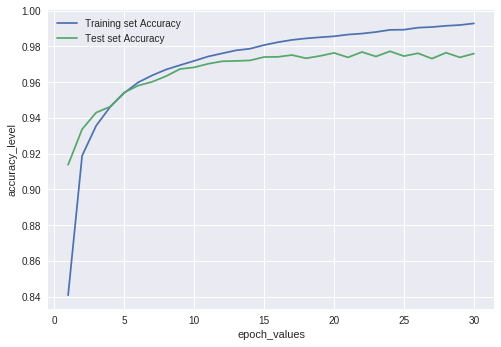

In [9]:
#plotting in the graph
plotaccuracy = plt.plot(range(1,31),history.history['acc'],range(1,31),history.history['val_acc'])
plt.xlabel('epoch_values')
plt.ylabel('accuracy_level')
plt.legend(('Training set Accuracy','Test set Accuracy'))
plt.show(plotaccuracy)